###  Lab3


https://stackoverflow.com/questions/56993687/numpy-how-to-convert-colour-matrices-into-a-flattened-vector
refered to the above link to get flattened vactor 

https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_peak_local_max.html


 height and width are 98,100
shape of original image: (100, 98)


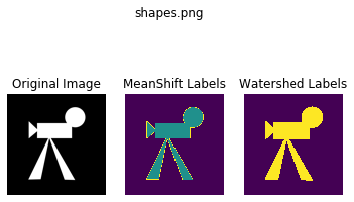

 height and width are 100,77
shape of original image: (77, 100)


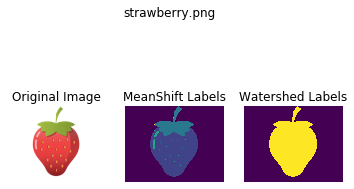

 height and width are 100,77
shape of original image: (99, 100)


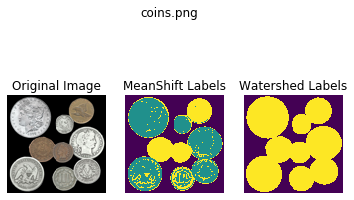

 height and width are 100,99
shape of original image: (100, 100)


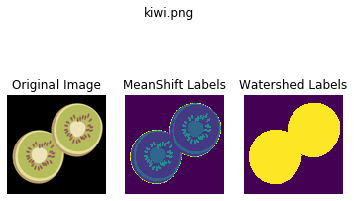

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image

size = 100, 100

img_names = ["shapes.png", "strawberry.png"]
ext_names = ["coins.png", "kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()
    
for img_path in images:
    img = Image.open(img_path)
    img.thumbnail(size)
    #
    # +--------------------+
    # |     Task 1         |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    width ,height = img.size
    print(f" height and width are {width},{height}")
    #img_mat = np.array(img)[:, :, :3]
    r = np.array(img)[:,:,0].flatten()
    g = np.array(img)[:,:,1].flatten()
    b = np.array(img)[:,:,2].flatten()
    
    # Step 2 - Combine the three colour channels by flatten each channel 
    # then stacking the flattened channels together.
    # This gives the "colour_samples"
    colour_samples = np.column_stack([r,g,b])
    # Step 3 - Perform Meanshift  clustering
    # For larger images, this may take a few minutes to compute.
    mean_cluster = MeanShift(bin_seeding=True)
    # Step 4 - reshape ms_labels back to the original image shape 
    # for displaying the segmentation output 
    #ms_labels = []
    ms_labels = mean_cluster.fit_predict(colour_samples)
    ms_labels = ms_labels.reshape(height,width)

#%%
    #
    # +--------------------+
    # |     Task 2         |
    # +--------------------+
    #

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.
    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_array = img.convert("L")
    img_array = np.array(img_array)
    print("shape of original image:",img_array.shape)
    # Step 2 - Calculate the distance transform
    # Hint: use ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    
    
    local_maxi = peak_local_max(-distance, indices=False, footprint=np.ones((5, 5)),labels=img_array)
    markers = ndi.label(local_maxi)[0]
    ws_labels = watershed(-distance, markers, mask=img_array)

    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")
    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    # plot_three_images(img_path, img, "Original Image", -distance, "Watershed Distance",
    #                   ws_labels, "Watershed Labels")

#%%
#
# +-------------------+
# |     Task 3        |
# +-------------------+
#
# Loop for the extension component   
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)
    print(f" height and width are {width},{height}")
    #img_mat = np.array(img)[:, :, :3]
    width ,height = img.size
    r = np.array(img)[:,:,0].flatten()
    g = np.array(img)[:,:,1].flatten()
    b = np.array(img)[:,:,2].flatten()

    colour_samples = np.column_stack([r,g,b])
    
    # TODO: perform meanshift on image

    mean_cluster = MeanShift(bin_seeding=True)
    ms_labels = mean_cluster.fit_predict(colour_samples)
    ms_labels = ms_labels.reshape(height,width)


    # TODO: perform an optimisation and then watershed on image
    img_array = img.convert("L")
    img_array = np.array(img_array)
    print("shape of original image:",img_array.shape)
    distance = ndi.distance_transform_edt(img_array)
    local_maxi = peak_local_max(-distance, indices=False, footprint=np.ones((5, 5)),labels=img_array)
    markers = ndi.label(local_maxi)[0]
    ws_labels = watershed(-distance, markers, mask=img_array)

    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")
    